### Thinking 
1. 机器学习中的监督学习、非监督学习、强化学习有何区别  
监督学习、无监督学习、强化学习都是机器学习的分支，强化学习的思路和人比较类似，是在实践中学习。  
强化学习与监督学习的区别在于：强化学习没有监督学习已经准备好的训练数据输出值，强化学习只有奖励值，但是这个奖励值和监督学习的输出值不一样，它不是事先给出的，而是延后给出的。  
强化学习与非监督学习的区别在于：在非监督学习中既没有输出值也没有奖励值的，只有数据特征，而强化学习有奖励值（为负是为惩罚），此外非监督学习与监督学习一样，数据之间也都是独立的，没有强化学习这样的前后依赖关系。    
监督学习与非监督学习的区别：监督学习有数据输出值（标签），非监督学习没有。


2. 什么是策略网络，价值网络，有何区别  
策略网络：对于给定的输入，通过学习给出一个确定输出的网络：（动作1，状态1），（动作2，状态2）  
价值网络（数值网络）：通过计算目前状态s的累积分数的期望，价值网络给游戏中的状态赋予一个分数（数值），每个状态都经历了整个数值网络
奖励更多的状态，会在数值网络中的数值Value更大  
区别（以围棋棋局为例）：策略网络的输出，是一个落子的概率分布，比如，棋盘中现在轮到白棋走，蓝点代表成为下一手的可能性。价值网络的输出，是一个可能获胜的数值，即“价值”，这个价值训练是一种回归(regression)，即调整网络的权重来逼近每一种棋局真实的输赢预测
对于价值网络，当前局面的价值=对终局的估计。  



3. 请简述MCTS（蒙特卡洛树搜索）的原理，4个步骤Select, Expansion，Simluation，Backpropagation是如何操作的  
原理：MCTS的作用是通过模拟来进行预测输出结果，理论上可以用于以{state,action}为定义的任何领域  
Selection -- 选择，从根节点开始，按一定策略，搜索到叶子节点；  
Expansion -- 扩展，对叶子节点扩展一个或多个合法的子节点；  
Simulation -- 对子节点采用随机的方式（这也是为什么称之为蒙特卡洛的原因）模拟若干次实验。模拟到最终状态时即可得到当前模拟所得的分数；  
Backpropagation -- 回传，根据子节点若干次模拟的得分，更新当前子节点的模拟次数与得分值。同时将模拟次数与得分值回传到其所有祖先节点并更新祖先节点。    
在围棋中：每个节点代表一个局面，A/B代表被访问B次，黑棋赢了A次，我们将不断重复一个过程：  
Step1，选择Selection，从根节点往下走，每次都选一个“最有价值的子节点”，直到找到“存在未扩展的子节点”，即这个局面存在未走过的后续着法的节点，比如 3/3 节点  
Step2，扩展Expansion，给这个节点加上一个 0/0 子节点，对应之前所说的“未扩展的子节点”  
Step3，模拟Simluation，用快速走子策略（Rollout policy）走到底，得到一个胜负结果  
Step4，回传Backup，把模拟的结果加到它的所有父节点上，假设模拟的结果是 0/1，就把0/1加到所有父节点上   


4. 假设你是抖音的技术负责人，强化学习在信息流推荐中会有怎样的作用，如果要进行使用强化学习，都有哪些要素需要考虑  
将用户短视频观看行为看作马尔可夫过程，对马尔科夫决策过程进行建模，实现基于强化学习的排序决策决策模型，可以使得搜索更加智能化。  
需要考虑：用户观看历史（是否看完，观看时长），推荐反馈（是否点击）等。  


5. 在自动驾驶中，如何使用强化学习进行训练，请说明简要的思路    
在自动驾驶场景中，使agent与environment进行交互，通过获取reward，并且通过调整其策略，通过平衡exploration与exploitation（探索与利用），最大化奖励函数，最终获取最大的累积reward。   



### Action
Action（五子棋）：  
棋盘大小 10 * 10,采用强化学习（策略价值网络），用AI训练五子棋AI,请说明都有哪些模块，不同模块的原理  
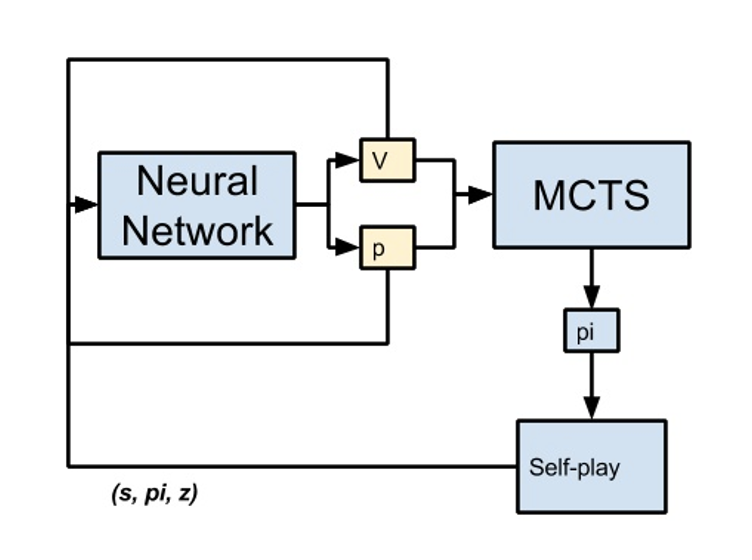


* 模块一 -- Policy Value Network，神经网络与策略价值网络
策略网络，输入当前的状态，神经网络输出在这个状态下采取每个动作的概率；价值网络，对于价值网络，当前局面的价值=对终局的估计。使用一个深度神经网络将棋盘表示和历史记录作为输入，输出落子概率和价值。

* 模块二 -- MCTS，蒙特卡洛树搜索
可以提供很好的策略改善，它的输入是个普通的策略（normal policy），我们可以通过MCTS得到一个更好的策略（good policy）输出
通过MCTS完成自我对弈，从而更新策略网络